In [ ]:
import tweepy
import webbrowser
from tweepy import Stream
from tweepy.streaming import StreamListener
from tweepy import Cursor
from tweepy import API
import pandas as pd
import numpy as np
import re
from textblob import Word, TextBlob
import nltk
import matplotlib.pyplot as plt
import json

In [ ]:
# We shall be analysing tweets with respect to presidential debate

with open('manager.json') as f:
    data = json.load(f)
    consumer_key = data['API_key']
    consumer_secret = data['API_secret_Key']
    Bearer_Token = data['Bearer_Token']


callback_url= 'oob'
auth= tweepy.OAuthHandler(consumer_key,consumer_secret,callback_url) # Authenticate our User
redirect_url = auth.get_authorization_url() # Get URL to direct user
# print(redirect_url)
webbrowser.open(redirect_url)
user_pint_input = input ("What's the pin value? ")
user_pint_input
auth.get_access_token(user_pint_input)
api= tweepy.API(auth, wait_on_rate_limit=True)
me = api.me()

In [ ]:
# Setting up tweeter handler
hashtag = '#covid-19'
query = tweepy.Cursor(api.search, q=hashtag,lang='en').items(300)  # The search method will help us search
# print(dir(query)) 
tweets = [ {'Tweets':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
# print(tweets)

# Import tweets into a data frame
# convert dictionary to list
tweets = list(tweets) 
df = pd.DataFrame(tweets, columns=['Tweets','Timestamp'])
# print(df)

# Cleaning tweets
def clean_text(raw_text):
    raw_text = re.sub(r'@[A-Za-z0-9]+','',raw_text) # Remove all @mentions and numbers
    raw_text = re.sub(r'#','',raw_text) # Remove the # symbol
    raw_text = re.sub(r'RT[\s]+','',raw_text) # Removing the RT
    raw_text = re.sub(r'https?:\/\/\S+','',raw_text) # Remove hyper links
    raw_text = re.sub(r':','',raw_text)
    raw_text = re.sub(r'_','',raw_text)
    raw_text = re.sub(r'\n\n','',raw_text)
    raw_text = re.sub(r'--&','',raw_text)
    raw_text = re.sub(r'\n','',raw_text)
    return raw_text

df['Tweets'] = df['Tweets'].apply(clean_text)

# print(df)
#print(df.shape)

# Remove emorjis
def removeEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df['Tweets'] = df['Tweets'].apply(removeEmojify)

# print(df)

# Subjectivity and the polarity

# How much a piece of text is based on emotion or how objective or subjective it is ranging from 0 to 1
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# How positive or negative something is ranging from -1 to 1
def getPolarity(text): 
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# print(df)

# Create a new function to compute negative, neutral and positive analysis

def getAnalysys(score):
        if score<0:
            return 'Negative'
        else:
            return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysys)

# print(df)

In [ ]:

# Plot Polarity vs Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# Show value counts

df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
# plt.show()

In [ ]:
# If you provide a single list or array to plot, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has 
# the same length as y but starts with 0. Hence the x data are [0, 1, 2, 3].
plt.figure(figsize=(8,6))
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [ ]:
# To plot x versus y, you can write:
plt.figure(figsize=(8,6))
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

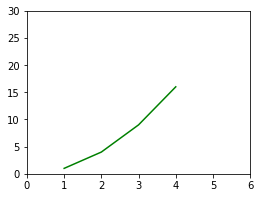

In [14]:
# For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the 
# color and line type of the plot. The default format string is 'b-', which is a solid blue line. 
plt.figure(figsize=(4,3))
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'green')
plt.axis([0, 6, 0, 30]) # We can set the min and max values for the X and Y cordinates
plt.show()

In [ ]:
# There are some instances where you have data in a format that lets you access particular variables with strings. For example, pandas.DataFrame.
# Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding 
# to these variables.

plt.figure(figsize=(8,6))
plt.scatter(df['Polarity'],df['Subjectivity'], color='Blue')
plt.title('Example')
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

In [ ]:


plt.figure(figsize=(8,6))
plt.plot(df['Analysis'],df['Timestamp'], 'Blue')
plt.title('Example')
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()